In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
x = resnet152V2.output
x = GlobalAveragePooling2D()(x)

In [6]:
x = Dense(512, activation='relu')(x)

In [7]:
folders = glob('Datasets/train/*')
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3250 images belonging to 33 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 330 images belonging to 33 classes.


In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
102/102 [==============================] - 625s 6s/step - loss: 1.2837 - accuracy: 0.6369 - val_loss: 0.6694 - val_accuracy: 0.8000
Epoch 2/20
102/102 [==============================] - 615s 6s/step - loss: 0.5031 - accuracy: 0.8431 - val_loss: 0.5637 - val_accuracy: 0.8242
Epoch 3/20
102/102 [==============================] - 615s 6s/step - loss: 0.3983 - accuracy: 0.8677 - val_loss: 0.4604 - val_accuracy: 0.8576
Epoch 4/20
102/102 [==============================] - 615s 6s/step - loss: 0.2725 - accuracy: 0.9135 - val_loss: 0.4404 - val_accuracy: 0.8515
Epoch 5/20
102/102 [==============================] - 614s 6s/step - loss: 0.2397 - accuracy: 0.9209 - val_loss: 0.4194 - val_accuracy: 0.8606
Epoch 6/20
102/102 [==============================] - 612s 6s/step - loss: 0.2010 - accuracy: 0.9342 - val_loss: 0.4160 - val_accuracy: 0.8788
Epoch 7/20
102/102 [==============================] - 630s 6s/step

In [16]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
102/102 [==============================] - 41140s 403s/step - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.3645 - val_accuracy: 0.9091
Epoch 2/30
102/102 [==============================] - 635s 6s/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.3501 - val_accuracy: 0.9242
Epoch 3/30
102/102 [==============================] - 676s 7s/step - loss: 0.0358 - accuracy: 0.9865 - val_loss: 0.3881 - val_accuracy: 0.9030
Epoch 4/30
102/102 [==============================] - 651s 6s/step - loss: 0.0426 - accuracy: 0.9840 - val_loss: 0.3857 - val_accuracy: 0.9061
Epoch 5/30
102/102 [==============================] - 638s 6s/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.3434 - val_accuracy: 0.9182
Epoch 6/30
102/102 [==============================] - 643s 6s/step - loss: 0.0204 - accuracy: 0.9948 - val_loss: 0.3804 - val_accuracy: 0.9121
Epoch 7/30
102/102 [==============================] - 657s 6s/step - loss: 0.0580 - accuracy: 0.9794 - val_loss: 0.4531 - val_accuracy: 0.

In [18]:
import matplotlib.pyplot as plt

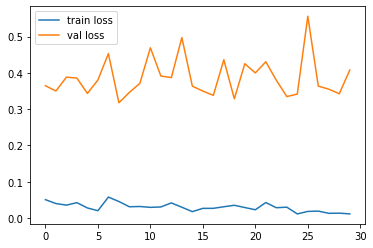

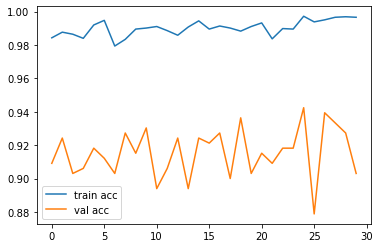

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model
model.save('model_resnet152V2.h5')

In [21]:
y_pred = model.predict(test_set)

In [22]:
y_pred

array([[4.20693672e-13, 2.06669212e-14, 1.71692837e-16, ...,
        9.99994755e-01, 3.72874695e-07, 8.80957543e-07],
       [1.28613783e-06, 2.74532272e-08, 2.45510762e-07, ...,
        3.54920826e-09, 5.90935997e-06, 2.56857504e-08],
       [2.01119698e-12, 6.22559838e-13, 4.50650489e-11, ...,
        3.36868533e-09, 6.34179642e-08, 5.77232394e-11],
       ...,
       [1.05128681e-14, 1.19102266e-15, 1.86919860e-14, ...,
        2.25086971e-09, 2.66802438e-08, 1.00000000e+00],
       [9.64258006e-17, 8.39328260e-12, 2.22826649e-15, ...,
        2.62485810e-06, 9.98593509e-01, 1.16315785e-11],
       [1.19233956e-10, 1.39653957e-12, 1.35437122e-11, ...,
        1.24561583e-10, 2.14477112e-08, 1.34738498e-09]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([30, 26, 23, 12, 18, 12, 10, 16, 15,  8, 19,  9, 32,  2, 18, 13,  2,
        8, 23, 24, 12, 14, 28, 15,  3,  2, 30,  0, 24,  2, 21, 16, 10, 13,
        4, 15,  4, 17, 16,  1, 29,  7,  0, 14, 16,  1, 18, 31, 12,  7, 28,
       24, 20,  4, 10, 15, 27, 24,  5, 23,  9, 20, 10, 26, 31, 25,  5, 18,
        2, 10,  8, 22, 26,  0,  6, 25, 18, 21, 19,  5, 12, 23,  4,  9,  2,
       24,  4, 24, 12, 32, 21,  7,  6, 25,  5, 23,  1, 24, 32,  0,  8, 20,
       20, 29, 12,  6, 13, 16, 23, 15, 28,  7, 24, 31, 30, 22, 27, 32,  6,
       32, 20, 22, 12, 11, 26,  4,  5, 15, 15,  3,  4, 28, 25,  3, 32, 18,
       16,  9,  6,  8, 17, 19,  1,  9, 28,  5, 25, 20, 15, 13, 10, 10, 23,
       23, 17, 13, 21, 16, 22, 24, 15, 16, 21,  8, 11, 19,  4,  3,  2, 19,
        3,  0,  9,  1, 19, 25, 17,  7,  1, 14, 31,  4,  1, 14,  9, 30,  4,
       25, 20, 22, 13,  8, 14,  6, 18, 24,  9, 25, 13, 22, 21, 31, 13,  2,
       27,  5,  6, 19, 14, 10, 15,  8, 13, 11,  2, 12,  7, 28, 18,  1, 27,
       22, 18, 11, 11,  6